## 모듈 impot


In [1]:
from IPython.display import Image
import numpy as np
import pandas as pd
import seaborn as sns

## 실습에 활용할 데이터셋

## 타이타닉 : 탑승객의 사망자 생존자 데이터 분석


In [2]:
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### 컬럼(column) 설명


- survived : 생존여부(1 : 생존, 0 : 사망)
- plcass : 좌석등급 (1등급, 2등급, 3등급)
- sex : 성별
- age : 나이(float)
- sibsp : 형제 + 배우자 수
- parch : 부모 + 자녀 수
- fare : 좌석 요금
- embarked : 탑승 항구 (S, C, Q)
- class : pclass와 동일
- who : 남자(man), 여자(woman), 아이(child)\
- deck : 데크 번호 (알파벳 + 숫자 혼용)
- embark_town : 탑승 항구 이름
- alive : 생존여부 (yes, no)
- alone : 혼자 탑승 여부


### 데이터 분석!

**주요 목표**

- Pandas를 활용하여 타이타닉호 생존자, 사망자 **데이터를 분석**합니다.

- 데이터를 토대로 생존율이 높은 승객, 생존율이 낮은 승객은 누구인지 판단합니다.


## head() 앞 부분 / tail() 뒷 부분 조회

- default 옵션으로 **5개의 row가 조회**됩니다.

- 괄호 안에 숫자를 넣어 명시적으로 조회하고 싶은 행의 개수를 지정할 수 있습니다.


In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [5]:
df.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


In [6]:
df.tail(7)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
884,0,3,male,25.0,0,0,7.050,S,Third,man,True,NaN,Southampton,no,True
885,0,3,female,39.0,0,5,29.125,Q,Third,woman,False,NaN,Queenstown,no,False
886,0,2,male,27.0,0,0,13.000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.450,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.000,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.750,Q,Third,man,True,NaN,Queenstown,no,True


## info()


- column별 정보(information)을 보여줍니다.
- 데이터의 개수, 그리고 데이터 type을 확인 할 때 사용합니다.


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


**object**타입은 쉽게 문자열이라고 생각하면 됩니다.

그런데, **category** 타입도 있습니다. category 타입은 문자열이지만, '남자'/'여자' 처럼 카테고리화 할 수 있는 칼럼을 의미합니다. 나중에 별도로 다루겠습니다.


## value_counts()


column 별 **값의 분포를 확인**할 때 사용합니다.

**남자, 여자, 아이의 데이터 분포를 확인**하고 싶다면 다음과 같이 실행합니다.


In [10]:
df['who'].value_counts()

who
man      537
woman    271
child     83
Name: count, dtype: int64

#### 연습문제


In [11]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


`embark_town`은 승객의 탑승 항구를 나타내는 column입니다. 탑승 항구별 승객 데이터 분포를 확인해 주세요.


In [12]:
# 코드를 입력해 주세요
df['embark_town'].value_counts()

embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

<p><strong>[출력 결과]</strong></p>
<pre>Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64</pre>


`who` column에 대한 데이터 분포를 확인해 주세요.


In [13]:
# 코드를 입력해 주세요
df['who'].value_counts()

who
man      537
woman    271
child     83
Name: count, dtype: int64

<p><strong>[출력 결과]</strong></p>
<pre>man      537
woman    271
child     83
Name: who, dtype: int64</pre>


## 속성: Attributes

속성 값은 **함수형으로 조회하지 않습니다.**

자주 활용하는 DataFrame의 **속성 값**들은 다음과 같습니다.

- ndim
- shape
- index
- columns
- values
- T


**차원**을 나타냅니다. DataFrame은 2가 출력됩니다.


In [15]:
df.ndim

2

**(행, 열)** 순서로 출력됩니다.


In [15]:
df.shape

(891, 15)

index는 기본 설정된 **RangeIndex**가 **출력**됩니다.


In [17]:
df.index

RangeIndex(start=0, stop=891, step=1)

columns는 **열**을 출력 합니다.


In [18]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

values는 모든 값을 출력하며, **numpy array 형식으로 출력**됩니다.


In [19]:
df.values

array([[0, 3, 'male', ..., 'Southampton', 'no', False],
       [1, 1, 'female', ..., 'Cherbourg', 'yes', False],
       [1, 3, 'female', ..., 'Southampton', 'yes', True],
       ...,
       [0, 3, 'female', ..., 'Southampton', 'no', False],
       [1, 1, 'male', ..., 'Cherbourg', 'yes', True],
       [0, 3, 'male', ..., 'Queenstown', 'no', True]], dtype=object)

**T : 전치(Transpose)** 는 index와 Column의 축을 교환합니다.


In [20]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,881,882,883,884,885,886,887,888,889,890
survived,0,1,1,1,0,0,0,0,1,1,...,0,0,0,0,0,0,1,0,1,0
pclass,3,1,3,1,3,3,1,3,3,2,...,3,3,2,3,3,2,1,3,1,3
sex,male,female,female,female,male,male,male,male,female,female,...,male,female,male,male,female,male,female,female,male,male
age,22.0,38.0,26.0,35.0,35.0,NaN,54.0,2.0,27.0,14.0,...,33.0,22.0,28.0,25.0,39.0,27.0,19.0,NaN,26.0,32.0
sibsp,1,1,0,1,0,0,0,3,0,1,...,0,0,0,0,0,0,0,1,0,0
parch,0,0,0,0,0,0,0,1,2,0,...,0,0,0,0,5,0,0,2,0,0
fare,7.25,71.2833,7.925,53.1,8.05,8.4583,51.8625,21.075,11.1333,30.0708,...,7.8958,10.5167,10.5,7.05,29.125,13.0,30.0,23.45,30.0,7.75
embarked,S,C,S,S,S,Q,S,S,S,C,...,S,S,S,S,Q,S,S,S,C,Q
class,Third,First,Third,First,Third,Third,First,Third,Third,Second,...,Third,Third,Second,Third,Third,Second,First,Third,First,Third
who,man,woman,woman,woman,man,man,man,child,woman,child,...,man,woman,man,man,woman,man,woman,woman,man,man


## 타입 변환 (astype)


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


**pclass의 타입**을 `int32`로 변경


In [22]:
df['pclass'].astype('int32').head()

0    3
1    1
2    3
3    1
4    3
Name: pclass, dtype: int32

`float32`로 변경


In [23]:
df['pclass'].astype('float32').head()

0    3.0
1    1.0
2    3.0
3    1.0
4    3.0
Name: pclass, dtype: float32

`object`로 변경


In [24]:
df['pclass'].astype('object').head()

0    3
1    1
2    3
3    1
4    3
Name: pclass, dtype: object

`category`로 변경.

`category`로 변경 시에는 Categories가 같이 출력 됩니다.


In [25]:
df['pclass'].astype('category').head()

0    3
1    1
2    3
3    1
4    3
Name: pclass, dtype: category
Categories (3, int64): [1, 2, 3]

## 정렬 (sort)


### sort_index : index 정렬

- index 기준으로 정렬합니다. (기본 오름차순이 적용되어 있습니다.)
- 내림차순 정렬을 적용하려면, `ascending=False`를 옵션 값으로 설정합니다.


In [26]:
df.sort_index().head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [18]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [19]:
df.sort_index(ascending=False).head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True


### sort_values : 값에 대한 정렬

- 값을 기준으로 행을 정렬합니다.
- by에 기준이 되는 행을 설정합니다.
- by에 2개 이상의 컬럼을 지정하여 정렬할 수 있습니다.
- 오름차순/내림차순을 컬럼 별로 지정할 수 있습니다.


In [28]:
df.sort_values(by='age').head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
803,1,3,male,0.42,0,1,8.5167,C,Third,child,False,NaN,Cherbourg,yes,False
755,1,2,male,0.67,1,1,14.5000,S,Second,child,False,NaN,Southampton,yes,False
644,1,3,female,0.75,2,1,19.2583,C,Third,child,False,NaN,Cherbourg,yes,False
469,1,3,female,0.75,2,1,19.2583,C,Third,child,False,NaN,Cherbourg,yes,False
78,1,2,male,0.83,0,2,29.0000,S,Second,child,False,NaN,Southampton,yes,False


In [21]:
df.sort_values('age').head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
803,1,3,male,0.42,0,1,8.5167,C,Third,child,False,NaN,Cherbourg,yes,False
755,1,2,male,0.67,1,1,14.5000,S,Second,child,False,NaN,Southampton,yes,False
644,1,3,female,0.75,2,1,19.2583,C,Third,child,False,NaN,Cherbourg,yes,False
469,1,3,female,0.75,2,1,19.2583,C,Third,child,False,NaN,Cherbourg,yes,False
78,1,2,male,0.83,0,2,29.0000,S,Second,child,False,NaN,Southampton,yes,False


In [20]:
df['age'].sort_values().head()

803    0.42
755    0.67
644    0.75
469    0.75
78     0.83
Name: age, dtype: float64

내림차순 정렬 : `ascending=False`


In [29]:
df.sort_values(by='age', ascending=False).head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
630,1,1,male,80.0,0,0,30.0000,S,First,man,True,A,Southampton,yes,True
851,0,3,male,74.0,0,0,7.7750,S,Third,man,True,NaN,Southampton,no,True
493,0,1,male,71.0,0,0,49.5042,C,First,man,True,NaN,Cherbourg,no,True
96,0,1,male,71.0,0,0,34.6542,C,First,man,True,A,Cherbourg,no,True
116,0,3,male,70.5,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,no,True


**문자열 컬럼도 오름차순/내림차순 정렬이 가능**하며 알파벳 순서로 정렬됩니다.


In [30]:
df.sort_values(by='class', ascending=False).head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
511,0,3,male,NaN,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
500,0,3,male,17.0,0,0,8.6625,S,Third,man,True,NaN,Southampton,no,True
501,0,3,female,21.0,0,0,7.7500,Q,Third,woman,False,NaN,Queenstown,no,True
502,0,3,female,NaN,0,0,7.6292,Q,Third,woman,False,NaN,Queenstown,no,True


**2개 이상의 컬럼**을 기준으로 값 정렬 할 수 있습니다.


In [31]:
df.sort_values(['fare', 'age']).head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
302,0,3,male,19.0,0,0,0.0,S,Third,man,True,NaN,Southampton,no,True
271,1,3,male,25.0,0,0,0.0,S,Third,man,True,NaN,Southampton,yes,True
179,0,3,male,36.0,0,0,0.0,S,Third,man,True,NaN,Southampton,no,True
822,0,1,male,38.0,0,0,0.0,S,First,man,True,NaN,Southampton,no,True
806,0,1,male,39.0,0,0,0.0,S,First,man,True,A,Southampton,no,True


In [32]:
df.sort_values(by=['fare', 'age']).head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
302,0,3,male,19.0,0,0,0.0,S,Third,man,True,NaN,Southampton,no,True
271,1,3,male,25.0,0,0,0.0,S,Third,man,True,NaN,Southampton,yes,True
179,0,3,male,36.0,0,0,0.0,S,Third,man,True,NaN,Southampton,no,True
822,0,1,male,38.0,0,0,0.0,S,First,man,True,NaN,Southampton,no,True
806,0,1,male,39.0,0,0,0.0,S,First,man,True,A,Southampton,no,True


오름차순/내림차순 정렬도 컬럼 **각각에 지정**해 줄 수 있습니다.


In [33]:
df.sort_values(['fare', 'age'], ascending=[False, True]).head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
258,1,1,female,35.0,0,0,512.3292,C,First,woman,False,NaN,Cherbourg,yes,True
737,1,1,male,35.0,0,0,512.3292,C,First,man,True,B,Cherbourg,yes,True
679,1,1,male,36.0,0,1,512.3292,C,First,man,True,B,Cherbourg,yes,False
27,0,1,male,19.0,3,2,263.0000,S,First,man,True,C,Southampton,no,False
88,1,1,female,23.0,3,2,263.0000,S,First,woman,False,C,Southampton,yes,False


df.sort_values(['column1', 'column2', ...], asending = (bool_lists)) 일 때
항상 column1부터 bool_list의 값대로 정렬한 후 그 다음 column2를 진행하는 방식이다


In [35]:
bool_list = [False, True]
column_list = ['age', 'fare']
df.sort_values(by=column_list, ascending=bool_list).head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
630,1,1,male,80.0,0,0,30.0000,S,First,man,True,A,Southampton,yes,True
851,0,3,male,74.0,0,0,7.7750,S,Third,man,True,NaN,Southampton,no,True
96,0,1,male,71.0,0,0,34.6542,C,First,man,True,A,Cherbourg,no,True
493,0,1,male,71.0,0,0,49.5042,C,First,man,True,NaN,Cherbourg,no,True
116,0,3,male,70.5,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,no,True


### 연습문제


`tips` 데이터는 미국 레스토랑의 매출과 웨이터에게 지불한 팁을 나타내는 데이터입니다.


In [23]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


- `total_bill`과 `tip`에 대한 내림차순 정렬을 해주세요
- 상위 10개만 출력하세요


In [24]:
# 코드를 입력해 주세요
tips.sort_values(by=['total_bill', 'tip'], ascending=[False, False]).head(10)

,total_bill,tip,sex,smoker,day,time,size
170,50.81,10.00,Male,Yes,Sat,Dinner,3
212,48.33,9.00,Male,No,Sat,Dinner,4
59,48.27,6.73,Male,No,Sat,Dinner,4
156,48.17,5.00,Male,No,Sun,Dinner,6
182,45.35,3.50,Male,Yes,Sun,Dinner,3
102,44.30,2.50,Female,Yes,Sat,Dinner,3
197,43.11,5.00,Female,Yes,Thur,Lunch,4
142,41.19,5.00,Male,No,Thur,Lunch,5
184,40.55,3.00,Male,Yes,Sun,Dinner,2
95,40.17,4.73,Male,Yes,Fri,Dinner,4


<p><strong>[출력 결과]</strong></p>
<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }

</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>total_bill</th>
      <th>tip</th>
      <th>sex</th>
      <th>smoker</th>
      <th>day</th>
      <th>time</th>
      <th>size</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>170</th>
      <td>50.81</td>
      <td>10.00</td>
      <td>Male</td>
      <td>Yes</td>
      <td>Sat</td>
      <td>Dinner</td>
      <td>3</td>
    </tr>
    <tr>
      <th>212</th>
      <td>48.33</td>
      <td>9.00</td>
      <td>Male</td>
      <td>No</td>
      <td>Sat</td>
      <td>Dinner</td>
      <td>4</td>
    </tr>
    <tr>
      <th>59</th>
      <td>48.27</td>
      <td>6.73</td>
      <td>Male</td>
      <td>No</td>
      <td>Sat</td>
      <td>Dinner</td>
      <td>4</td>
    </tr>
    <tr>
      <th>156</th>
      <td>48.17</td>
      <td>5.00</td>
      <td>Male</td>
      <td>No</td>
      <td>Sun</td>
      <td>Dinner</td>
      <td>6</td>
    </tr>
    <tr>
      <th>182</th>
      <td>45.35</td>
      <td>3.50</td>
      <td>Male</td>
      <td>Yes</td>
      <td>Sun</td>
      <td>Dinner</td>
      <td>3</td>
    </tr>
    <tr>
      <th>102</th>
      <td>44.30</td>
      <td>2.50</td>
      <td>Female</td>
      <td>Yes</td>
      <td>Sat</td>
      <td>Dinner</td>
      <td>3</td>
    </tr>
    <tr>
      <th>197</th>
      <td>43.11</td>
      <td>5.00</td>
      <td>Female</td>
      <td>Yes</td>
      <td>Thur</td>
      <td>Lunch</td>
      <td>4</td>
    </tr>
    <tr>
      <th>142</th>
      <td>41.19</td>
      <td>5.00</td>
      <td>Male</td>
      <td>No</td>
      <td>Thur</td>
      <td>Lunch</td>
      <td>5</td>
    </tr>
    <tr>
      <th>184</th>
      <td>40.55</td>
      <td>3.00</td>
      <td>Male</td>
      <td>Yes</td>
      <td>Sun</td>
      <td>Dinner</td>
      <td>2</td>
    </tr>
    <tr>
      <th>95</th>
      <td>40.17</td>
      <td>4.73</td>
      <td>Male</td>
      <td>Yes</td>
      <td>Fri</td>
      <td>Dinner</td>
      <td>4</td>
    </tr>
  </tbody>
</table>
</div>


- `size`를 기준으로 내림차순, `tip`을 기준으로는 오름차순 정렬을 해주세요
- 상위 10개의 데이터를 출력하세요


In [26]:
# 코드를 입력해 주세요
tips.sort_values(by=['size', 'tip'], ascending=[False, True]).head(10)

,total_bill,tip,sex,smoker,day,time,size
125,29.80,4.20,Female,No,Thur,Lunch,6
143,27.05,5.00,Female,No,Thur,Lunch,6
156,48.17,5.00,Male,No,Sun,Dinner,6
141,34.30,6.70,Male,No,Thur,Lunch,6
187,30.46,2.00,Male,Yes,Sun,Dinner,5
216,28.15,3.00,Male,Yes,Sat,Dinner,5
142,41.19,5.00,Male,No,Thur,Lunch,5
185,20.69,5.00,Male,No,Sun,Dinner,5
155,29.85,5.14,Female,No,Sun,Dinner,5
153,24.55,2.00,Male,No,Sun,Dinner,4


<p><strong>[출력 결과]</strong></p>
<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }

</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>total_bill</th>
      <th>tip</th>
      <th>sex</th>
      <th>smoker</th>
      <th>day</th>
      <th>time</th>
      <th>size</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>125</th>
      <td>29.80</td>
      <td>4.20</td>
      <td>Female</td>
      <td>No</td>
      <td>Thur</td>
      <td>Lunch</td>
      <td>6</td>
    </tr>
    <tr>
      <th>143</th>
      <td>27.05</td>
      <td>5.00</td>
      <td>Female</td>
      <td>No</td>
      <td>Thur</td>
      <td>Lunch</td>
      <td>6</td>
    </tr>
    <tr>
      <th>156</th>
      <td>48.17</td>
      <td>5.00</td>
      <td>Male</td>
      <td>No</td>
      <td>Sun</td>
      <td>Dinner</td>
      <td>6</td>
    </tr>
    <tr>
      <th>141</th>
      <td>34.30</td>
      <td>6.70</td>
      <td>Male</td>
      <td>No</td>
      <td>Thur</td>
      <td>Lunch</td>
      <td>6</td>
    </tr>
    <tr>
      <th>187</th>
      <td>30.46</td>
      <td>2.00</td>
      <td>Male</td>
      <td>Yes</td>
      <td>Sun</td>
      <td>Dinner</td>
      <td>5</td>
    </tr>
    <tr>
      <th>216</th>
      <td>28.15</td>
      <td>3.00</td>
      <td>Male</td>
      <td>Yes</td>
      <td>Sat</td>
      <td>Dinner</td>
      <td>5</td>
    </tr>
    <tr>
      <th>142</th>
      <td>41.19</td>
      <td>5.00</td>
      <td>Male</td>
      <td>No</td>
      <td>Thur</td>
      <td>Lunch</td>
      <td>5</td>
    </tr>
    <tr>
      <th>185</th>
      <td>20.69</td>
      <td>5.00</td>
      <td>Male</td>
      <td>No</td>
      <td>Sun</td>
      <td>Dinner</td>
      <td>5</td>
    </tr>
    <tr>
      <th>155</th>
      <td>29.85</td>
      <td>5.14</td>
      <td>Female</td>
      <td>No</td>
      <td>Sun</td>
      <td>Dinner</td>
      <td>5</td>
    </tr>
    <tr>
      <th>153</th>
      <td>24.55</td>
      <td>2.00</td>
      <td>Male</td>
      <td>No</td>
      <td>Sun</td>
      <td>Dinner</td>
      <td>4</td>
    </tr>
  </tbody>
</table>
</div>


## Indexing, Slicing, 조건 필터링

In [29]:
df.head(6)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True


### loc - indexing / slicing

- Indexing과 slicing을 할 수 있습니다.
- slicing은 **[시작(포함): 끝(포함)]** 규칙에 유의합니다. 둘 다 포함합니다


**indexing 예시**


In [28]:
df.loc[5, 'class']

'Third'

**fancy indexing 예시**


In [30]:
df.loc[2:5, ['age', 'fare', 'who']]

,age,fare,who
2,26.0,7.9250,woman
3,35.0,53.1000,woman
4,35.0,8.0500,man
5,NaN,8.4583,man


In [33]:
df.loc[2:20:2, ['age', 'fare']]

,age,fare
2,26.0,7.9250
4,35.0,8.0500
6,54.0,51.8625
8,27.0,11.1333
10,4.0,16.7000
12,20.0,8.0500
14,14.0,7.8542
16,2.0,29.1250
18,31.0,18.0000
20,35.0,26.0000


In [48]:
data = {
    'name' : ['K', 'L','5', 'who'],
    'age' : [29, 50, 2.3, 222],
}
df1 = pd.DataFrame(data)
df1.index = list('가나다라')
df1.loc['가':'다', ['name', 'age']]

,name,age
가,K,29.0
나,L,50.0
다,5,2.3


**slcing 예시**


In [49]:
df.loc[2:5, 'class':'deck'].head()

,class,who,adult_male,deck
2,Third,woman,False,NaN
3,First,woman,False,C
4,Third,man,True,NaN
5,Third,man,True,NaN


In [50]:
df.loc[2:5, 'class':'deck']

,class,who,adult_male,deck
2,Third,woman,False,NaN
3,First,woman,False,C
4,Third,man,True,NaN
5,Third,man,True,NaN


In [50]:
df.loc[:6, 'class':'deck']

,class,who,adult_male,deck
0,Third,man,True,NaN
1,First,woman,False,C
2,Third,woman,False,NaN
3,First,woman,False,C
4,Third,man,True,NaN
5,Third,man,True,NaN
6,First,man,True,E


### 연습문제


In [52]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


다음과 같은 결과를 가지도록 인덱싱 혹은 슬라이싱 하세요


In [51]:
# 코드를 입력해 주세요
df.loc[3:7]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False


<p><strong>[출력 결과]</strong></p>
<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }

</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>survived</th>
      <th>pclass</th>
      <th>sex</th>
      <th>age</th>
      <th>sibsp</th>
      <th>parch</th>
      <th>fare</th>
      <th>embarked</th>
      <th>class</th>
      <th>who</th>
      <th>adult_male</th>
      <th>deck</th>
      <th>embark_town</th>
      <th>alive</th>
      <th>alone</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>3</th>
      <td>1</td>
      <td>1</td>
      <td>female</td>
      <td>35.0</td>
      <td>1</td>
      <td>0</td>
      <td>53.1000</td>
      <td>S</td>
      <td>First</td>
      <td>woman</td>
      <td>False</td>
      <td>C</td>
      <td>Southampton</td>
      <td>yes</td>
      <td>False</td>
    </tr>
    <tr>
      <th>4</th>
      <td>0</td>
      <td>3</td>
      <td>male</td>
      <td>35.0</td>
      <td>0</td>
      <td>0</td>
      <td>8.0500</td>
      <td>S</td>
      <td>Third</td>
      <td>man</td>
      <td>True</td>
      <td>NaN</td>
      <td>Southampton</td>
      <td>no</td>
      <td>True</td>
    </tr>
    <tr>
      <th>5</th>
      <td>0</td>
      <td>3</td>
      <td>male</td>
      <td>NaN</td>
      <td>0</td>
      <td>0</td>
      <td>8.4583</td>
      <td>Q</td>
      <td>Third</td>
      <td>man</td>
      <td>True</td>
      <td>NaN</td>
      <td>Queenstown</td>
      <td>no</td>
      <td>True</td>
    </tr>
    <tr>
      <th>6</th>
      <td>0</td>
      <td>1</td>
      <td>male</td>
      <td>54.0</td>
      <td>0</td>
      <td>0</td>
      <td>51.8625</td>
      <td>S</td>
      <td>First</td>
      <td>man</td>
      <td>True</td>
      <td>E</td>
      <td>Southampton</td>
      <td>no</td>
      <td>True</td>
    </tr>
    <tr>
      <th>7</th>
      <td>0</td>
      <td>3</td>
      <td>male</td>
      <td>2.0</td>
      <td>3</td>
      <td>1</td>
      <td>21.0750</td>
      <td>S</td>
      <td>Third</td>
      <td>child</td>
      <td>False</td>
      <td>NaN</td>
      <td>Southampton</td>
      <td>no</td>
      <td>False</td>
    </tr>
  </tbody>
</table>
</div>


In [52]:
# 코드를 입력해 주세요
df.loc[:4, 'pclass':'fare']

,pclass,sex,age,sibsp,parch,fare
0,3,male,22.0,1,0,7.2500
1,1,female,38.0,1,0,71.2833
2,3,female,26.0,0,0,7.9250
3,1,female,35.0,1,0,53.1000
4,3,male,35.0,0,0,8.0500


<p><strong>[출력 결과]</strong></p>
<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }

</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>pclass</th>
      <th>sex</th>
      <th>age</th>
      <th>sibsp</th>
      <th>parch</th>
      <th>fare</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>3</td>
      <td>male</td>
      <td>22.0</td>
      <td>1</td>
      <td>0</td>
      <td>7.2500</td>
    </tr>
    <tr>
      <th>1</th>
      <td>1</td>
      <td>female</td>
      <td>38.0</td>
      <td>1</td>
      <td>0</td>
      <td>71.2833</td>
    </tr>
    <tr>
      <th>2</th>
      <td>3</td>
      <td>female</td>
      <td>26.0</td>
      <td>0</td>
      <td>0</td>
      <td>7.9250</td>
    </tr>
    <tr>
      <th>3</th>
      <td>1</td>
      <td>female</td>
      <td>35.0</td>
      <td>1</td>
      <td>0</td>
      <td>53.1000</td>
    </tr>
    <tr>
      <th>4</th>
      <td>3</td>
      <td>male</td>
      <td>35.0</td>
      <td>0</td>
      <td>0</td>
      <td>8.0500</td>
    </tr>
  </tbody>
</table>
</div>


In [55]:
# 코드를 입력해주세요
df.loc[2:10:2, ['age', 'who']]

,age,who
2,26.0,woman
4,35.0,man
6,54.0,man
8,27.0,woman
10,4.0,child


<p><strong>[출력 결과]</strong></p>
<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }

</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>age</th>
      <th>who</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>2</th>
      <td>26.0</td>
      <td>woman</td>
    </tr>
    <tr>
      <th>4</th>
      <td>35.0</td>
      <td>man</td>
    </tr>
    <tr>
      <th>6</th>
      <td>54.0</td>
      <td>man</td>
    </tr>
    <tr>
      <th>8</th>
      <td>27.0</td>
      <td>woman</td>
    </tr>
    <tr>
      <th>10</th>
      <td>4.0</td>
      <td>child</td>
    </tr>
  </tbody>
</table>
</div>


### loc - 조건 필터


boolean index를 만들어 조건에 맞는 데이터만 추출해 낼 수 있습니다.


In [59]:
cond = (df['age'] >= 70)
cond

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: age, Length: 891, dtype: bool

In [60]:
df.loc[cond]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
96,0,1,male,71.0,0,0,34.6542,C,First,man,True,A,Cherbourg,no,True
116,0,3,male,70.5,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,no,True
493,0,1,male,71.0,0,0,49.5042,C,First,man,True,NaN,Cherbourg,no,True
630,1,1,male,80.0,0,0,30.0000,S,First,man,True,A,Southampton,yes,True
672,0,2,male,70.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True
745,0,1,male,70.0,1,1,71.0000,S,First,man,True,B,Southampton,no,False
851,0,3,male,74.0,0,0,7.7750,S,Third,man,True,NaN,Southampton,no,True


In [65]:
df.loc[cond]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
96,0,1,male,71.0,0,0,34.6542,C,First,man,True,A,Cherbourg,no,True
116,0,3,male,70.5,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,no,True
493,0,1,male,71.0,0,0,49.5042,C,First,man,True,NaN,Cherbourg,no,True
630,1,1,male,80.0,0,0,30.0000,S,First,man,True,A,Southampton,yes,True
672,0,2,male,70.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True
745,0,1,male,70.0,1,1,71.0000,S,First,man,True,B,Southampton,no,False
851,0,3,male,74.0,0,0,7.7750,S,Third,man,True,NaN,Southampton,no,True


In [61]:
df.loc[cond].sort_values('age', ascending=False)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
630,1,1,male,80.0,0,0,30.0000,S,First,man,True,A,Southampton,yes,True
851,0,3,male,74.0,0,0,7.7750,S,Third,man,True,NaN,Southampton,no,True
96,0,1,male,71.0,0,0,34.6542,C,First,man,True,A,Cherbourg,no,True
493,0,1,male,71.0,0,0,49.5042,C,First,man,True,NaN,Cherbourg,no,True
116,0,3,male,70.5,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,no,True
672,0,2,male,70.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True
745,0,1,male,70.0,1,1,71.0000,S,First,man,True,B,Southampton,no,False


In [62]:
df.loc[cond].sort_values('fare', ascending=False)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
745,0,1,male,70.0,1,1,71.0000,S,First,man,True,B,Southampton,no,False
493,0,1,male,71.0,0,0,49.5042,C,First,man,True,NaN,Cherbourg,no,True
96,0,1,male,71.0,0,0,34.6542,C,First,man,True,A,Cherbourg,no,True
630,1,1,male,80.0,0,0,30.0000,S,First,man,True,A,Southampton,yes,True
672,0,2,male,70.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True
851,0,3,male,74.0,0,0,7.7750,S,Third,man,True,NaN,Southampton,no,True
116,0,3,male,70.5,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,no,True


### loc - 다중 조건

다중 조건은 먼저 condition을 정의하고 & 와 | 연산자로 **복합 조건을 생성**합니다.


In [63]:
# 조건 1 정의
cond1 = (df['fare'] > 30)

# 조건 2 정의
cond2 = (df['who'] == 'woman')

In [64]:
df.loc[cond1 & cond2]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
25,1,3,female,38.0,1,5,31.3875,S,Third,woman,False,NaN,Southampton,yes,False
31,1,1,female,NaN,1,0,146.5208,C,First,woman,False,B,Cherbourg,yes,False
52,1,1,female,49.0,1,0,76.7292,C,First,woman,False,D,Cherbourg,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,1,1,female,16.0,0,1,39.4000,S,First,woman,False,D,Southampton,yes,False
856,1,1,female,45.0,1,1,164.8667,S,First,woman,False,NaN,Southampton,yes,False
863,0,3,female,NaN,8,2,69.5500,S,Third,woman,False,NaN,Southampton,no,False
871,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False


In [74]:
df.loc[cond1 | cond2]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,1,2,female,25.0,0,1,26.0000,S,Second,woman,False,NaN,Southampton,yes,False
882,0,3,female,22.0,0,0,10.5167,S,Third,woman,False,NaN,Southampton,no,True
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


조건 필터 후 데이터 대입


In [65]:
cond = (df['age'] >= 70)
cond

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: age, Length: 891, dtype: bool

In [66]:
# 조건 필터
df.loc[cond]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
96,0,1,male,71.0,0,0,34.6542,C,First,man,True,A,Cherbourg,no,True
116,0,3,male,70.5,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,no,True
493,0,1,male,71.0,0,0,49.5042,C,First,man,True,NaN,Cherbourg,no,True
630,1,1,male,80.0,0,0,30.0000,S,First,man,True,A,Southampton,yes,True
672,0,2,male,70.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True
745,0,1,male,70.0,1,1,71.0000,S,First,man,True,B,Southampton,no,False
851,0,3,male,74.0,0,0,7.7750,S,Third,man,True,NaN,Southampton,no,True


In [68]:
df_cond = df.loc[cond]
df_cond['age']

96     71.0
116    70.5
493    71.0
630    80.0
672    70.0
745    70.0
851    74.0
Name: age, dtype: float64

나이 칼럼만 가져옵니다.


In [77]:
df.loc[cond, 'age']

96     71.0
116    70.5
493    71.0
630    80.0
672    70.0
745    70.0
851    74.0
Name: age, dtype: float64

조건 필터 후 원하는 값을 대입할 수 있습니다. (단일 컬럼 선택에 유의)


In [78]:
df.loc[cond, 'age'] = -1

In [79]:
df.loc[cond]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
96,0,1,male,-1.0,0,0,34.6542,C,First,man,True,A,Cherbourg,no,True
116,0,3,male,-1.0,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,no,True
493,0,1,male,-1.0,0,0,49.5042,C,First,man,True,NaN,Cherbourg,no,True
630,1,1,male,-1.0,0,0,30.0000,S,First,man,True,A,Southampton,yes,True
672,0,2,male,-1.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True
745,0,1,male,-1.0,1,1,71.0000,S,First,man,True,B,Southampton,no,False
851,0,3,male,-1.0,0,0,7.7750,S,Third,man,True,NaN,Southampton,no,True


### 연습문제


데이터를 다시 로드합니다


In [69]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


다음 조건을 만족하는 코드를 입력하세요.

- 나이가 30살 이상 남자 승객 조건 필터링
- `fare`를 많이 낸 순서로 내림차순 정렬
- 상위 10개를 출력


In [74]:
# 코드를 입력해 주세요
df.keys()

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [76]:
print(df['who'].value_counts())
print(df['sex'].value_counts())

who
man      537
woman    271
child     83
Name: count, dtype: int64
sex
male      577
female    314
Name: count, dtype: int64


In [81]:
cond1 = (df['age'] < 16)
df.loc[cond1, 'sex'].value_counts()

sex
female    43
male      40
Name: count, dtype: int64

In [94]:
cond = (df['age'] >= 30) & (df['sex'] == 'male')
df.loc[cond].sort_values(by='fare', ascending=False).head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
679,1,1,male,36.0,0,1,512.3292,C,First,man,True,B,Cherbourg,yes,False
737,1,1,male,35.0,0,0,512.3292,C,First,man,True,B,Cherbourg,yes,True
438,0,1,male,64.0,1,4,263.0000,S,First,man,True,C,Southampton,no,False
332,0,1,male,38.0,0,1,153.4625,S,First,man,True,C,Southampton,no,False
660,1,1,male,50.0,2,0,133.6500,S,First,man,True,NaN,Southampton,yes,False
390,1,1,male,36.0,1,2,120.0000,S,First,man,True,B,Southampton,yes,False
659,0,1,male,58.0,0,2,113.2750,C,First,man,True,D,Cherbourg,no,False
698,0,1,male,49.0,1,1,110.8833,C,First,man,True,C,Cherbourg,no,False
544,0,1,male,50.0,1,0,106.4250,C,First,man,True,C,Cherbourg,no,False
224,1,1,male,38.0,1,0,90.0000,S,First,man,True,C,Southampton,yes,False


<p><strong>[출력 결과]</strong></p>
<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }

</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>survived</th>
      <th>pclass</th>
      <th>sex</th>
      <th>age</th>
      <th>sibsp</th>
      <th>parch</th>
      <th>fare</th>
      <th>embarked</th>
      <th>class</th>
      <th>who</th>
      <th>adult_male</th>
      <th>deck</th>
      <th>embark_town</th>
      <th>alive</th>
      <th>alone</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>679</th>
      <td>1</td>
      <td>1</td>
      <td>male</td>
      <td>36.0</td>
      <td>0</td>
      <td>1</td>
      <td>512.3292</td>
      <td>C</td>
      <td>First</td>
      <td>man</td>
      <td>True</td>
      <td>B</td>
      <td>Cherbourg</td>
      <td>yes</td>
      <td>False</td>
    </tr>
    <tr>
      <th>737</th>
      <td>1</td>
      <td>1</td>
      <td>male</td>
      <td>35.0</td>
      <td>0</td>
      <td>0</td>
      <td>512.3292</td>
      <td>C</td>
      <td>First</td>
      <td>man</td>
      <td>True</td>
      <td>B</td>
      <td>Cherbourg</td>
      <td>yes</td>
      <td>True</td>
    </tr>
    <tr>
      <th>438</th>
      <td>0</td>
      <td>1</td>
      <td>male</td>
      <td>64.0</td>
      <td>1</td>
      <td>4</td>
      <td>263.0000</td>
      <td>S</td>
      <td>First</td>
      <td>man</td>
      <td>True</td>
      <td>C</td>
      <td>Southampton</td>
      <td>no</td>
      <td>False</td>
    </tr>
    <tr>
      <th>332</th>
      <td>0</td>
      <td>1</td>
      <td>male</td>
      <td>38.0</td>
      <td>0</td>
      <td>1</td>
      <td>153.4625</td>
      <td>S</td>
      <td>First</td>
      <td>man</td>
      <td>True</td>
      <td>C</td>
      <td>Southampton</td>
      <td>no</td>
      <td>False</td>
    </tr>
    <tr>
      <th>660</th>
      <td>1</td>
      <td>1</td>
      <td>male</td>
      <td>50.0</td>
      <td>2</td>
      <td>0</td>
      <td>133.6500</td>
      <td>S</td>
      <td>First</td>
      <td>man</td>
      <td>True</td>
      <td>NaN</td>
      <td>Southampton</td>
      <td>yes</td>
      <td>False</td>
    </tr>
    <tr>
      <th>390</th>
      <td>1</td>
      <td>1</td>
      <td>male</td>
      <td>36.0</td>
      <td>1</td>
      <td>2</td>
      <td>120.0000</td>
      <td>S</td>
      <td>First</td>
      <td>man</td>
      <td>True</td>
      <td>B</td>
      <td>Southampton</td>
      <td>yes</td>
      <td>False</td>
    </tr>
    <tr>
      <th>659</th>
      <td>0</td>
      <td>1</td>
      <td>male</td>
      <td>58.0</td>
      <td>0</td>
      <td>2</td>
      <td>113.2750</td>
      <td>C</td>
      <td>First</td>
      <td>man</td>
      <td>True</td>
      <td>D</td>
      <td>Cherbourg</td>
      <td>no</td>
      <td>False</td>
    </tr>
    <tr>
      <th>698</th>
      <td>0</td>
      <td>1</td>
      <td>male</td>
      <td>49.0</td>
      <td>1</td>
      <td>1</td>
      <td>110.8833</td>
      <td>C</td>
      <td>First</td>
      <td>man</td>
      <td>True</td>
      <td>C</td>
      <td>Cherbourg</td>
      <td>no</td>
      <td>False</td>
    </tr>
    <tr>
      <th>544</th>
      <td>0</td>
      <td>1</td>
      <td>male</td>
      <td>50.0</td>
      <td>1</td>
      <td>0</td>
      <td>106.4250</td>
      <td>C</td>
      <td>First</td>
      <td>man</td>
      <td>True</td>
      <td>C</td>
      <td>Cherbourg</td>
      <td>no</td>
      <td>False</td>
    </tr>
    <tr>
      <th>224</th>
      <td>1</td>
      <td>1</td>
      <td>male</td>
      <td>38.0</td>
      <td>1</td>
      <td>0</td>
      <td>90.0000</td>
      <td>S</td>
      <td>First</td>
      <td>man</td>
      <td>True</td>
      <td>C</td>
      <td>Southampton</td>
      <td>yes</td>
      <td>False</td>
    </tr>
  </tbody>
</table>
</div>


다음 조건을 만족하는 코드를 입력하세요.

- 나이가 20살 이상 40살 미만인 승객
- `pclass`가 1등급 혹은 2등급인 승객
- 열(column)은 `survived`, `pclass`, `age`, `fare` 만 나오게 출력
- 10개만 출력


In [95]:
df['pclass'].value_counts()

pclass
3    491
1    216
2    184
Name: count, dtype: int64

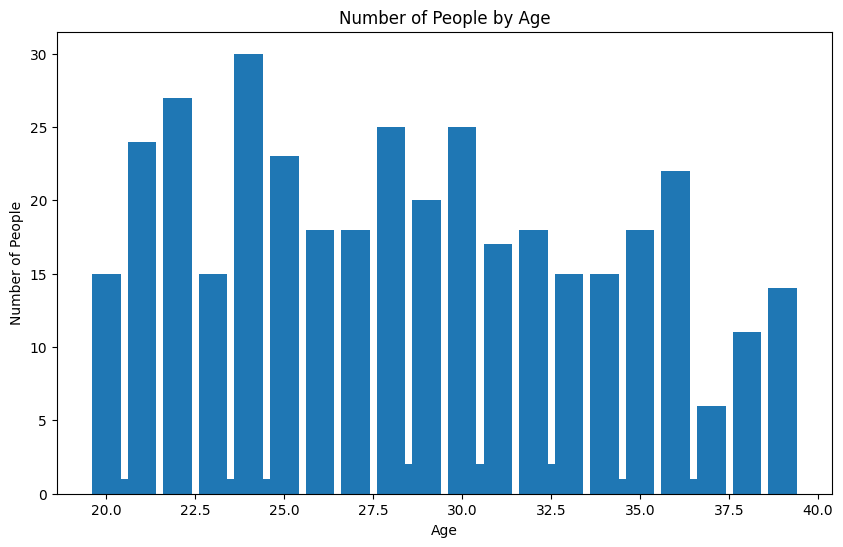

In [121]:
import matplotlib.pyplot as plt
cond1 = (df['age'] >= 20) & (df['age'] < 40)
df1 = df.loc[cond1, 'age'].sort_values()

age_counts = df1.value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(age_counts.index, age_counts.values)
plt.xlabel('Age')
plt.ylabel('Number of People')
plt.title('Number of People by Age')
plt.show()

In [126]:
cond2 = (df['pclass'] != 3)
df.loc[cond2].value_counts('pclass')

pclass
1    216
2    184
Name: count, dtype: int64

In [143]:
f = ['survived', 'pclass', 'age', 'fare']
df.loc[cond1 & cond2, f].head(10)

,survived,pclass,age,fare
1,1,1,38.0,71.2833
3,1,1,35.0,53.1000
20,0,2,35.0,26.0000
21,1,2,34.0,13.0000
23,1,1,28.0,35.5000
34,0,1,28.0,82.1708
41,0,2,27.0,21.0000
53,1,2,29.0,26.0000
56,1,2,21.0,10.5000
61,1,1,38.0,80.0000


<p><strong>[출력 결과]</strong></p>
<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }

</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>survived</th>
      <th>pclass</th>
      <th>age</th>
      <th>fare</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>1</td>
      <td>1</td>
      <td>38.0</td>
      <td>71.2833</td>
    </tr>
    <tr>
      <th>3</th>
      <td>1</td>
      <td>1</td>
      <td>35.0</td>
      <td>53.1000</td>
    </tr>
    <tr>
      <th>20</th>
      <td>0</td>
      <td>2</td>
      <td>35.0</td>
      <td>26.0000</td>
    </tr>
    <tr>
      <th>21</th>
      <td>1</td>
      <td>2</td>
      <td>34.0</td>
      <td>13.0000</td>
    </tr>
    <tr>
      <th>23</th>
      <td>1</td>
      <td>1</td>
      <td>28.0</td>
      <td>35.5000</td>
    </tr>
    <tr>
      <th>34</th>
      <td>0</td>
      <td>1</td>
      <td>28.0</td>
      <td>82.1708</td>
    </tr>
    <tr>
      <th>41</th>
      <td>0</td>
      <td>2</td>
      <td>27.0</td>
      <td>21.0000</td>
    </tr>
    <tr>
      <th>53</th>
      <td>1</td>
      <td>2</td>
      <td>29.0</td>
      <td>26.0000</td>
    </tr>
    <tr>
      <th>56</th>
      <td>1</td>
      <td>2</td>
      <td>21.0</td>
      <td>10.5000</td>
    </tr>
    <tr>
      <th>61</th>
      <td>1</td>
      <td>1</td>
      <td>38.0</td>
      <td>80.0000</td>
    </tr>
  </tbody>
</table>
</div>


## iloc

- `loc`와 유사하지만, index만 허용합니다.
- loc와 마찬가지로, indexing / slicing 모두 가능합니다.


In [144]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


**indexing**


In [145]:
df.iloc[1, 3]

38.0

**Fancy Indexing**


In [146]:
df.iloc[[0, 3, 4], [0, 1, 5, 6]]

,survived,pclass,parch,fare
0,0,3,0,7.25
3,1,1,0,53.10
4,0,3,0,8.05


**Slicing**

In [147]:
df.iloc[:3, :5]

,survived,pclass,sex,age,sibsp
0,0,3,male,22.0,1
1,1,1,female,38.0,1
2,1,3,female,26.0,0


## isin

특정 값의 포함 여부는 isin function을 통해 비교가 가능합니다. (파이썬의 in 키워드는 사용 불가합니다.)

In [148]:
sample = pd.DataFrame({
    'name' : ['Kim', 'Lee', 'park', 'choi'],
    'age': [24, 27, 34, 19]
})
sample

,name,age
0,Kim,24
1,Lee,27
2,park,34
3,choi,19


In [99]:
sample['name'].isin(['Kim', 'Lee'])

0     True
1     True
2    False
3    False
Name: name, dtype: bool

In [149]:
sample['name'].isin(['Kim', 'Lee', 'park'])

0     True
1     True
2     True
3    False
Name: name, dtype: bool

In [150]:
sample.isin(['Kim', 'Lee'])

,name,age
0,True,False
1,True,False
2,False,False
3,False,False


In [163]:
dict1 = {
    'name' : ['Kim', 'Lee', 'park', 'choi'],
    'age': [24, 27, 34, 19],
    'float' : [1.2, 2.4, 3.6, 4.8]
}
sample2 = pd.DataFrame(dict1)
sample.loc[:, ['name', 'age']].isin(['Kim'])

,name,age
0,True,False
1,False,False
2,False,False
3,False,False


`loc`를 활용한 **조건 필터링**으로도 찰떡궁합입니다.

In [165]:
condition = sample['name'].isin(['Kim', 'Lee'])
condition

0     True
1     True
2    False
3    False
Name: name, dtype: bool

In [166]:
sample.loc[condition]

,name,age
0,Kim,24
1,Lee,27


In [171]:
cond = sample[['name', 'age']]
cond.isin(['Kim'])

,name,age
0,True,False
1,False,False
2,False,False
3,False,False


### 연습문제

In [201]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


- `tips` 데이터셋 중 `day`가 **금요일, 토요일**만 필터링 합니다.
- `tip`이 $10보다 적게 낸 데이터만 필터링 합니다.
- 칼럼은 `total_bill`, `tip`, `smoker`, `time`만 출력합니다.
- 상위 10개 행만 출력합니다

In [210]:
cond1 = (tips['day'] == 'Sat') | (tips['day'] == 'Fri')
cond2 = (tips['tip'] < 10)
tips.loc[cond1 & cond2]

,total_bill,tip,sex,smoker,day,time,size
19,20.65,3.35,Male,No,Sat,Dinner,3
20,17.92,4.08,Male,No,Sat,Dinner,2
21,20.29,2.75,Female,No,Sat,Dinner,2
22,15.77,2.23,Female,No,Sat,Dinner,2
23,39.42,7.58,Male,No,Sat,Dinner,4
...,...,...,...,...,...,...,...
238,35.83,4.67,Female,No,Sat,Dinner,3
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2


In [209]:
# 코드를 입력해 주세요
tips.loc[cond1 & cond2, ['total_bill', 'tip', 'smoker', 'time']].head(10)

,total_bill,tip,smoker,time
19,20.65,3.35,No,Dinner
20,17.92,4.08,No,Dinner
21,20.29,2.75,No,Dinner
22,15.77,2.23,No,Dinner
23,39.42,7.58,No,Dinner
24,19.82,3.18,No,Dinner
25,17.81,2.34,No,Dinner
26,13.37,2.00,No,Dinner
27,12.69,2.00,No,Dinner
28,21.70,4.30,No,Dinner


<p><strong>[출력 결과]</strong></p>
<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>total_bill</th>
      <th>tip</th>
      <th>smoker</th>
      <th>time</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>19</th>
      <td>20.65</td>
      <td>3.35</td>
      <td>No</td>
      <td>Dinner</td>
    </tr>
    <tr>
      <th>20</th>
      <td>17.92</td>
      <td>4.08</td>
      <td>No</td>
      <td>Dinner</td>
    </tr>
    <tr>
      <th>21</th>
      <td>20.29</td>
      <td>2.75</td>
      <td>No</td>
      <td>Dinner</td>
    </tr>
    <tr>
      <th>22</th>
      <td>15.77</td>
      <td>2.23</td>
      <td>No</td>
      <td>Dinner</td>
    </tr>
    <tr>
      <th>23</th>
      <td>39.42</td>
      <td>7.58</td>
      <td>No</td>
      <td>Dinner</td>
    </tr>
    <tr>
      <th>24</th>
      <td>19.82</td>
      <td>3.18</td>
      <td>No</td>
      <td>Dinner</td>
    </tr>
    <tr>
      <th>25</th>
      <td>17.81</td>
      <td>2.34</td>
      <td>No</td>
      <td>Dinner</td>
    </tr>
    <tr>
      <th>26</th>
      <td>13.37</td>
      <td>2.00</td>
      <td>No</td>
      <td>Dinner</td>
    </tr>
    <tr>
      <th>27</th>
      <td>12.69</td>
      <td>2.00</td>
      <td>No</td>
      <td>Dinner</td>
    </tr>
    <tr>
      <th>28</th>
      <td>21.70</td>
      <td>4.30</td>
      <td>No</td>
      <td>Dinner</td>
    </tr>
  </tbody>
</table>
</div>

### 제출

제출을 위해 새로 로드된 타이타닉 데이터셋에서 아래 조건을 만족하는 결과를 `result_df`에 저장하세요.

- 나이가 30살 이상 남자 승객 조건 필터링
- `fare`를 많이 낸 순서로 내림차순 정렬, 상위 10개

In [213]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [215]:
df['sex'].value_counts()

sex
male      577
female    314
Name: count, dtype: int64

In [216]:
df['who'].value_counts()

who
man      537
woman    271
child     83
Name: count, dtype: int64

In [223]:
cond = (df['sex'] == 'male') & (df['age'] >= 30)
df[cond].sort_values(by='fare', ascending=False)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
679,1,1,male,36.0,0,1,512.3292,C,First,man,True,B,Cherbourg,yes,False
737,1,1,male,35.0,0,0,512.3292,C,First,man,True,B,Cherbourg,yes,True
438,0,1,male,64.0,1,4,263.0000,S,First,man,True,C,Southampton,no,False
332,0,1,male,38.0,0,1,153.4625,S,First,man,True,C,Southampton,no,False
660,1,1,male,50.0,2,0,133.6500,S,First,man,True,NaN,Southampton,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
822,0,1,male,38.0,0,0,0.0000,S,First,man,True,NaN,Southampton,no,True
179,0,3,male,36.0,0,0,0.0000,S,Third,man,True,NaN,Southampton,no,True
806,0,1,male,39.0,0,0,0.0000,S,First,man,True,A,Southampton,no,True
597,0,3,male,49.0,0,0,0.0000,S,Third,man,True,NaN,Southampton,no,True


In [224]:
df[cond].sort_values(by='fare', ascending=False).head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
679,1,1,male,36.0,0,1,512.3292,C,First,man,True,B,Cherbourg,yes,False
737,1,1,male,35.0,0,0,512.3292,C,First,man,True,B,Cherbourg,yes,True
438,0,1,male,64.0,1,4,263.0000,S,First,man,True,C,Southampton,no,False
332,0,1,male,38.0,0,1,153.4625,S,First,man,True,C,Southampton,no,False
660,1,1,male,50.0,2,0,133.6500,S,First,man,True,NaN,Southampton,yes,False
390,1,1,male,36.0,1,2,120.0000,S,First,man,True,B,Southampton,yes,False
659,0,1,male,58.0,0,2,113.2750,C,First,man,True,D,Cherbourg,no,False
698,0,1,male,49.0,1,1,110.8833,C,First,man,True,C,Cherbourg,no,False
544,0,1,male,50.0,1,0,106.4250,C,First,man,True,C,Cherbourg,no,False
224,1,1,male,38.0,1,0,90.0000,S,First,man,True,C,Southampton,yes,False
